<a href="https://colab.research.google.com/github/ucchol/Applied-Cognitive-Modeling-CS--5390/blob/main/Cognitive_Exam_1_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using PyIBL for binary choice task

In this task, the agent is required to choose one of two options: Option A or Option B. A numerical outcome drawn from a distribution after the
selection, is the **immediate** feedback of the task. 

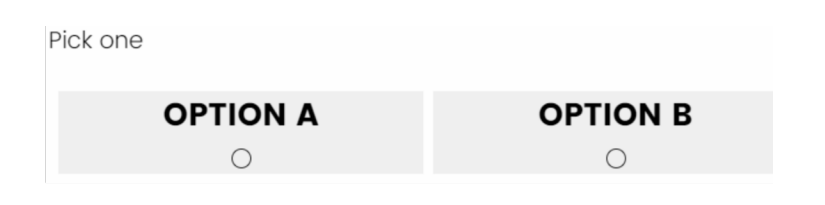
+ One option is safe and it yields a fixed medium outcome (i.e., 3)
+ The other option is risky, and it yields a high outcome (4) with some probability 0.8, and a low outcome (0) with the complementary
probability 0.2

In [ ]:
! pip install --upgrade pyibl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the libraries
import pyibl
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Task
•	Option A: The probability of receiving 500 points began at 1 and decreased by .01 on every trial. 
•	Option B: Always receive 250 points. 

A.	Develop an IBL model using PyIBL tool that makes a choice between option A and option B. Run 100 simulated participants, playing 100 trials of the defined task.  Please explain your model and discuss various parameters (decay, noise, pre-population). – 10 points


## Run a complete model

We have run one trial for the binary choice task, which includes choosing one option, observing the reward, storing the instance (respond). To conduct 100 runs of 100 trials, we use two for loops as follows:

In [ ]:
from pyibl import Agent

In [ ]:
# Set global variables
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TEMPERATURE = 1.0
#DEFAULT_OUTPUT_FILE = "box-data_Signaling.csv"
TARGET_COUNT = 2
TRIALS = 100

In [ ]:
def reset_agent(agent, noise=NOISE, temperature=TEMPERATURE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = decay
    agent.temperature = temperature
    agent.trace =False

In [ ]:
a = Agent(default_utility= 550, decay=0.50, noise=0.25) # define the agent
options = ['A','B'] # A is the safe option while B is the risky one
a.trace = True # True if you want to look at the activation, Probability of Retrieval and Blended Values


# Define the reward function
def reward(choice, prob):
  if choice == 'A': # Safe
    r = 250
  elif random.random() <= prob: # Risky
    r = 500
  else:
    r = 0
  return r


runs = 1 # number of runs (participants)
TRIALS = 100 # number of trials 
average_p = [] # to store average of performance (proportion of maximum reward expectation choice)
average_time = [] # to save time 
c_a=0
c_b=0
for r in range(runs): # Participants
  prob = 1 # Probability 
  pmax = []
  ttime = [0]
  a.reset() #clear the memory for a new run
  #a.populate(550, 'a')
  #a.populate(300, 'b')
  for i in range(TRIALS):     
    s = a.choose('a', 'b')
    if s == 'a':
      c_a += 1
      a.respond(np.random.choice([500,0], size=(1,), p=[prob, 1 - prob])[0])
    else:
      c_b += 1
      a.respond(250)
                
    prob = prob - 0.01
            
  print('choice a, choice b',c_a / (TRIALS * PARTICIPANTS), c_b / (TRIALS * PARTICIPANTS))


choice a, choice b 0.0 0.01


In [ ]:
plt.plot(range(TRIALS), np.mean(np.asarray(average_p),axis=0), color='darkgreen', markersize=2, linestyle='--', label='PyIBL')
plt.xlabel('Round')
plt.ylabel('PMAX')
plt.title('Performance')
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()